# Consumption problem

Imports and set magics:

In [599]:
import numpy as np
from scipy import stats as st
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import math as m
import time           
import seaborn as sns 

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

In this analysis, we wish to find the optimal consumption of 8 toiletpaper rolls for a household of 3 persons. We assumming that it is mid in the corona period and assuming that the toiletpaper are sold out for the next 14 days. The initial amount is 8 rolls that needs to be split over a period of 14 days. 

<b>Theory<b>

We consider an Euler Equation where the consumer preferences in each period, t, follows the condition: 
* $u(c_t)$ = $ln(c_t)$

The consumption in future periods is discounted with factor $β<1$
indicating the time-preference of the consumer.

The present value of the consumption path set in period 0 is given by:
* $V(c_0, c_1,..., c_T)$ = $\sum_{t=0}^T$ $\beta^t U(c_t)$

The consumer wishes to optimize his consumption for every period, $t=0, ..., T$ but for period $t+1$ the amount left to consume is smaller by the amount consumed the period before, given by

* $k_{t+1}$ = $k_t - c_t$

Therefore the following restriction must hold
* $k_t \geq 0$


# Analytical solution of the problem

The analytical solution that we want to derive using **sympy** is found by first inserting the constraing into the consumption path as follows

$\beta^t U(k_{t-1}-k_t)$ + $\beta^{t+1} U(k_t-k_{t+1})$

We then derive the the objective function s.t. $k_t$ to find the Euler equation
$U'(c_{t-1})= \beta U'(c_t)$ 

This can be interpreted as stating that if the consumer wishes to shift in consumption between two periods, he will not gain from such a shift as a reduction in consumption in period $t$ equals a decrease in $U_t$ by the amount $U'_t$. The amount that the consumer then saves will be shifted to the next period, $t_{+1}$, increasing the total utility by a discounted amount, $U'_{t+1}$. This amount equals $\beta \bullet U'_{t1}$. 

We know that in optimum, $k_{t+1}=0$. 

By inserting the utility function in the Euler equation, we then find 

$c_{t+1}= \beta c_t$

Combining this and the budget constraint we find the solution of the problem given by

$c_0 = ((1-\beta)/(1-\beta)^{T+1}) k_0 $

First we define all **symbols**:

In [600]:
t = 14
b = 0.8
k = np.zeros(t+1,float)
c = np.zeros(t+1,float)
u = np.zeros(t+1,float)
#Initial amount and time is set 
k[0] = 8  
c[0] = (1.0-b)/(1.0-b**(t+1)) * k[0]  
#Utility
u[0] = np.log(c[0])

for i in range(1,t+1):
    c[i] = beta * c[i-1]
    k[i] = k[i-1] - c[i-1]

    # Period utility with discounting
    u[i] = beta**(i-1)*np.log(c[i])

np.sum(u)  # total utility

print("c = " + str(c))
print("k = " + str(k))

c = [1.65834793 1.16084355 0.81259049 0.56881334 0.39816934 0.27871854
 0.19510298 0.13657208 0.09560046 0.06692032 0.04684422 0.03279096
 0.02295367 0.01606757 0.0112473 ]
k = [8.         6.34165207 5.18080852 4.36821803 3.79940469 3.40123535
 3.12251682 2.92741384 2.79084176 2.6952413  2.62832098 2.58147675
 2.5486858  2.52573213 2.50966456]


Next we **plot** the functions

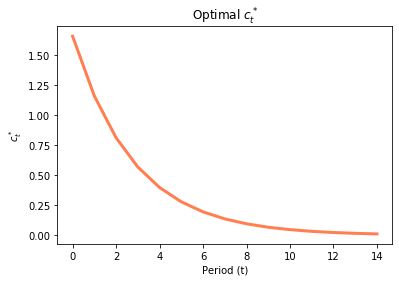

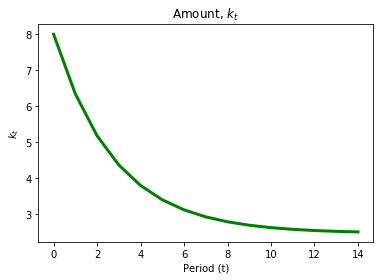

In [601]:
#plotting optimal consumption
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.5, hspace=0.8)
ax.plot(c, color='coral', linewidth=3)
ax.set_ylabel('$c^*_t$')
ax.set_xlabel('Period (t)')
ax.set_title('Optimal $c^*_t$')
plt.show()

#plotting optimal amount
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.5, hspace=0.8)
ax.plot(k, color='green', linewidth=3)
ax.set_ylabel('$k_t$')
ax.set_xlabel('Period (t)')
ax.set_title('Amount, $k_t$')
plt.show()


## Numerical solution

The general model is given by the utility function 

$\sum_{t=0}^T$ $\beta^t U(c_t)$ 

with one constraint
    $c_0,...c_t = k_0$

Stating that it is not possible to consume more of the good than the 10 acquired goods. 


We now define the **utility function**:

In [602]:
def utility(c):
    t = len(c)
    u= np.zeros(t,float)
    for i in range(t):
        b = 0.8
        #Calculating the utility of the entire period, disregarding the discount factor
        u[i] = (b**i) * np.log(c[i])

#to maximize the result, we take the negative result
    return (-np.sum(u))

#We then define the constraint above as
def constraint(c):
    k[0] = 8
    x_1 = np.sum(c) - k[0]
    return np.array([x_1])

**Solve** by calling the optimizer:

In [603]:
time = 14

#Now we initialize a guess for optimal c
c_guess = 0.3*np.ones(time,float)

#Using the optimizing function
c_op = optimize.fmin_slsqp(utility, c_guess, f_eqcons = constraint)

#Printing the solution
print(c_op)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.117958385863356
            Iterations: 20
            Function evaluations: 324
            Gradient evaluations: 20
[1.67303801 1.34008025 1.07113723 0.85670447 0.68547959 0.54837957
 0.43859723 0.351093   0.28086916 0.22471591 0.17961939 0.14335275
 0.11483848 0.09209497]


**Plotting the optimal consumtion of the period** given by the analytical result $c$ and the numerical result $c_{op}$ 

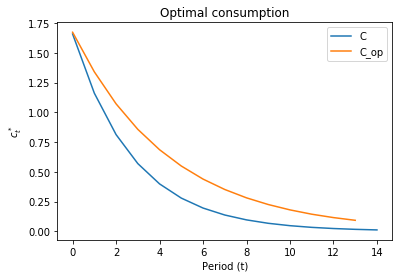

In [604]:
palette = sns.color_palette("mako_r", 2)
ax = sns.lineplot(data=c, hue="coherence", style="choice", palette=palette)
ax = sns.lineplot(data=c_op, hue="coherence", style="choice", palette=palette)
ax.set_title("Optimal consumption")
ax.set_xlabel("Period (t)")
ax.set_ylabel("$c^*_t$")
ax.legend(['C', 'C_op'], loc='mid', shadow=False)
plt.show()



# Results from the analysis

In [605]:
#Printing the results from calculations above

print('Analytical result')
print('c* = {}'.format(c))


print('Numerical result')
print('c_op* = {}'.format(c_op))


Analytical result
c* = [1.65834793 1.16084355 0.81259049 0.56881334 0.39816934 0.27871854
 0.19510298 0.13657208 0.09560046 0.06692032 0.04684422 0.03279096
 0.02295367 0.01606757 0.0112473 ]
Numerical result
c_op* = [1.67303801 1.34008025 1.07113723 0.85670447 0.68547959 0.54837957
 0.43859723 0.351093   0.28086916 0.22471591 0.17961939 0.14335275
 0.11483848 0.09209497]


# Conclusion

From the analysis above we see, that the analytical solution and the numerical solution are almost identical. However, in the numerical analysis it is seen that the household will start using more toiletpaper than in the analytical analysis. In both cases, the consumption falls with time, where in the numerical result, the household will run out of toiletpaper withing 13 days, whereas in the analytical result, the amount will last the entire period. 